In [1]:
import importlib
import os

if 'notebooks' in os.getcwd():
    os.chdir("..")

util = importlib.import_module(name="util")

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
ucla_swe_fsca = pd.read_csv(
    "/home/jovyan/shared-public/ml_swe_monitoring_prod/snotel_ghcnd_stations_4yrs_all_cols_small_addedUCLA.csv"
)
ucla_swe_fsca.head()

,Unnamed: 0,date,lat,lon,UCLA_fsca,UCLA_SWE
0,0,2019-11-06,48.50910,-110.96940,0.8212,0.0062
1,1,2019-02-24,39.03000,-106.08000,0.9870,0.1536
2,2,2021-04-19,33.60106,-111.71285,0.0000,NaN
3,3,2019-12-19,38.25000,-120.85000,0.0000,0.0000
4,4,2019-08-31,41.37200,-122.23000,0.0172,0.0018


In [4]:
small_train = pd.read_csv(
    "/home/jovyan/shared-public/ml_swe_monitoring_prod/snotel_ghcnd_stations_4yrs_all_cols_small.csv"
)
small_train.head()

,date,lat,lon,SWE,station_name,swe_value,change_in_swe_inch,snow_depth,air_temperature_observed_f,precipitation_amount,...,cumulative_SWE,cumulative_air_temperature_tmmn,cumulative_potential_evapotranspiration,cumulative_mean_vapor_pressure_deficit,cumulative_relative_humidity_rmax,cumulative_relative_humidity_rmin,cumulative_precipitation_amount,cumulative_air_temperature_tmmx,cumulative_wind_speed,cumulative_fsca
0,2019-11-06,48.50910,-110.96940,0.0,USC00241692,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
1,2019-02-24,39.03000,-106.08000,0.0,USS0006K43S,-999.0,0.0,864.0,0.0,0.0,...,-1.0,4.596961,2.428783,1.886321,4.069320,3.690063,2.415641,4.606591,2.934498,-1.0
2,2021-04-19,33.60106,-111.71285,0.0,USC00023190,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
3,2019-12-19,38.25000,-120.85000,0.0,0,0.0,0.0,0.0,0.0,0.0,...,-1.0,4.497234,2.709524,1.616895,3.933330,3.732450,2.036229,4.543274,2.605626,-1.0
4,2019-08-31,41.37200,-122.23000,0.0,0,0.0,0.0,0.0,0.0,0.0,...,-1.0,4.388281,2.764998,2.010851,3.645805,3.510826,1.056905,4.399980,2.486005,-1.0


In [5]:
train_join = pd.merge(small_train, ucla_swe_fsca, on=["date", "lat", "lon"], how="outer")
print(small_train.shape)
print(ucla_swe_fsca.shape)
print(train_join.shape)

(10000, 105)
(10000, 6)
(10000, 108)


In [7]:
# Swap fsca, keep original SWE
et_swap_fsca = util.small_training.ETHoleTiny()

chosen_columns_swap_fsca = [
  'UCLA_fsca',
  'air_temperature_tmmx', 
  'air_temperature_tmmn', 
  'potential_evapotranspiration', 
  'relative_humidity_rmax', 
  'Elevation',	
  'Slope',	
  'Curvature',	
  'Aspect',	
  'Eastness',	
  'Northness',
]

train_swap_fsca = train_join[train_join.UCLA_fsca >= 0]

et_swap_fsca.preprocess_data(train_swap_fsca, verbose=True, target="swe_value", chosen_columns=chosen_columns_swap_fsca)

Shape: (8877, 108)
Using features Index(['UCLA_fsca', 'air_temperature_tmmx', 'air_temperature_tmmn',
       'potential_evapotranspiration', 'relative_humidity_rmax', 'Elevation',
       'Slope', 'Curvature', 'Aspect', 'Eastness', 'Northness'],
      dtype='object')
Descriptive statistics
-- Training data --
         UCLA_fsca  air_temperature_tmmx  air_temperature_tmmn  \
count  6005.000000           6005.000000           6005.000000   
mean      0.143748            225.922748            214.057384   
std       0.319455            120.134295            113.347928   
min       0.000000              0.000000              0.000000   
25%       0.000000            270.800000            257.700000   
50%       0.000000            286.200000            270.800000   
75%       0.033800            295.200000            278.600000   
max       1.000000            314.900000            303.400000   

       potential_evapotranspiration  relative_humidity_rmax    Elevation  \
count              

In [8]:
et_swap_fsca.fit()

In [9]:
et_swap_fsca.evaluate()

{'rmse': 5.214920693082243,
 'mae': 1.4197635303913405,
 'r2': 0.4000826403527392}

In [10]:
# Swap SWE, use original FSCA
chosen_columns_swap_swe = [
  'fsca',
  'air_temperature_tmmx', 
  'air_temperature_tmmn', 
  'potential_evapotranspiration', 
  'relative_humidity_rmax', 
  'Elevation',	
  'Slope',	
  'Curvature',	
  'Aspect',	
  'Eastness',	
  'Northness',
]

train_swap_swe = train_join[train_join.UCLA_SWE >= 0].copy()
train_swap_swe["UCLA_SWE_in"] = train_join.UCLA_SWE * 39.3701

et_swap_swe = util.small_training.ETHoleTiny()
et_swap_swe.preprocess_data(train_swap_swe, verbose=True, target="UCLA_SWE_in", chosen_columns=chosen_columns_swap_swe)

Shape: (8568, 109)
Using features Index(['fsca', 'air_temperature_tmmx', 'air_temperature_tmmn',
       'potential_evapotranspiration', 'relative_humidity_rmax', 'Elevation',
       'Slope', 'Curvature', 'Aspect', 'Eastness', 'Northness'],
      dtype='object')
Descriptive statistics
-- Training data --
              fsca  air_temperature_tmmx  air_temperature_tmmn  \
count  8568.000000           8568.000000           8568.000000   
mean      4.712755            194.559092            185.101149   
std      15.594182            134.943612            128.087999   
min       0.000000              0.000000              0.000000   
25%       0.000000              0.000000              0.000000   
50%       0.000000            279.750000            267.600000   
75%       0.000000            292.600000            276.900000   
max      93.000000            314.900000            303.400000   

       potential_evapotranspiration  relative_humidity_rmax    Elevation  \
count                   

In [11]:
et_swap_swe.fit()
et_swap_swe.evaluate()

{'rmse': 4.3322777172082105, 'mae': 1.81078431754282, 'r2': 0.3316539915664427}

In [12]:
# Swap both
chosen_columns_swap_both = [
  'UCLA_fsca',
  'air_temperature_tmmx', 
  'air_temperature_tmmn', 
  'potential_evapotranspiration', 
  'relative_humidity_rmax', 
  'Elevation',	
  'Slope',	
  'Curvature',	
  'Aspect',	
  'Eastness',	
  'Northness',
]

train_swap_both = train_join[np.logical_and(
    train_join.UCLA_SWE >= 0,
    train_join.UCLA_fsca >= 0
)].copy()
train_swap_both["UCLA_SWE_in"] = train_join.UCLA_SWE * 39.3701

et_swap_both = util.small_training.ETHoleTiny()
et_swap_both.preprocess_data(train_swap_both, verbose=True, target="UCLA_SWE_in", chosen_columns=chosen_columns_swap_both)

Shape: (8567, 109)
Using features Index(['UCLA_fsca', 'air_temperature_tmmx', 'air_temperature_tmmn',
       'potential_evapotranspiration', 'relative_humidity_rmax', 'Elevation',
       'Slope', 'Curvature', 'Aspect', 'Eastness', 'Northness'],
      dtype='object')
Descriptive statistics
-- Training data --
         UCLA_fsca  air_temperature_tmmx  air_temperature_tmmn  \
count  8567.000000           8567.000000           8567.000000   
mean      0.204673            194.581802            185.122755   
std       0.370290            134.935113            128.079860   
min       0.000000              0.000000              0.000000   
25%       0.000000              0.000000              0.000000   
50%       0.000000            279.800000            267.600000   
75%       0.141400            292.600000            276.900000   
max       1.000000            314.900000            303.400000   

       potential_evapotranspiration  relative_humidity_rmax    Elevation  \
count              

In [13]:
et_swap_both.fit()
et_swap_both.evaluate()

{'rmse': 3.3963056707078327,
 'mae': 1.098481710709578,
 'r2': 0.5387142296445027}

## Show results on a map

In [30]:
predict_data = pd.read_csv("/home/jovyan/shared-public/ml_swe_monitoring_prod/compiled_testing_2020-02-01.csv")

predict_data["air_temperature_tmmn"] = predict_data["tmmn"]
predict_data["air_temperature_tmmx"] = predict_data["tmmx"]
predict_data["potential_evapotranspiration"] = predict_data["etr"]
predict_data["relative_humidity_rmax"] = predict_data["rmax"]
predict_data["UCLA_fsca"] = predict_data["UCLA_fsca"].replace(np.nan, 0)
predict_data = predict_data.dropna(subset=["Northness", "Eastness"])

In [32]:
print(predict_data.shape)
predict_data.head()

(6468, 37)


,Unnamed: 0.1,level_0,index,Latitude,Longitude,vpd,rmin,tmmn,tmmx,pr,...,water_year,Unnamed: 0,lat,lon,UCLA_fsca,UCLA_SWE,air_temperature_tmmn,air_temperature_tmmx,potential_evapotranspiration,relative_humidity_rmax
25,25,25,77754,44.968,-124.064,0.23,59.4,275.9,286.6,4.6,...,2020,25,44.968,-124.064,0.0,NaN,275.9,286.6,2.0,100.0
26,26,26,77755,44.968,-124.028,0.16,64.4,275.9,285.5,4.4,...,2020,26,44.968,-124.028,0.0,NaN,275.9,285.5,1.5,100.0
27,27,27,77756,44.968,-123.992,0.14,64.1,275.0,285.4,5.0,...,2020,27,44.968,-123.992,0.0,0.0,275.0,285.4,1.4,100.0
28,28,28,77757,44.968,-123.956,0.14,64.1,275.0,285.4,5.0,...,2020,28,44.968,-123.956,0.0,0.0,275.0,285.4,1.4,100.0
29,29,29,77758,44.968,-123.920,0.14,64.9,274.1,284.7,6.4,...,2020,29,44.968,-123.920,0.0,0.0,274.1,284.7,1.3,100.0


In [34]:
# Run all three models
predict_data["swe_predict_swap_swe"] = et_swap_swe.predict(predict_data[chosen_columns_swap_swe])
predict_data["swe_predict_swap_fsca"] = et_swap_fsca.predict(predict_data[chosen_columns_swap_fsca])
predict_data["swe_predict_swap_both"] = et_swap_both.predict(predict_data[chosen_columns_swap_both])

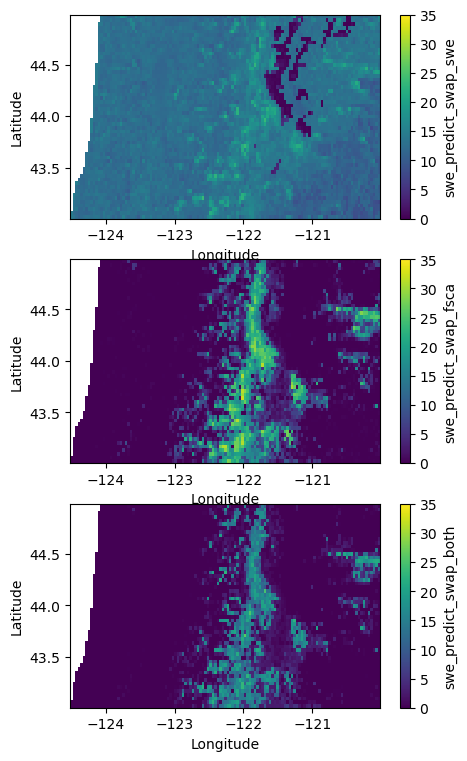

In [38]:
util.small_training.compare_spatial_output(
    predict_data,
    ["swe_predict_swap_swe", "swe_predict_swap_fsca", "swe_predict_swap_both"],
    lat_column="Latitude",
    lon_column="Longitude",
    plot_args=dict(vmin=0, vmax=35)
)

## Show results for several months

In [50]:
from glob import glob
data_dir = "/home/jovyan/shared-public/ml_swe_monitoring_prod/"
input_files = glob(data_dir + "/compiled_testing*")
print("\n".join(input_files))

/home/jovyan/shared-public/ml_swe_monitoring_prod/compiled_testing_2020-06-01.csv
/home/jovyan/shared-public/ml_swe_monitoring_prod/compiled_testing_2020-02-01.csv
/home/jovyan/shared-public/ml_swe_monitoring_prod/compiled_testing_2020-04-01.csv
/home/jovyan/shared-public/ml_swe_monitoring_prod/compiled_testing_2020-03-01.csv
/home/jovyan/shared-public/ml_swe_monitoring_prod/compiled_testing_2020-01-01.csv
/home/jovyan/shared-public/ml_swe_monitoring_prod/compiled_testing_2020-05-01.csv


In [51]:
def read_add_date(fname):
    date = fname[-14:-4]
    df = pd.read_csv(fname)
    df["date"] = date
    return df

all_input = pd.concat((read_add_date(f) for f in input_files), ignore_index=True)

In [53]:
# Rename inputs
all_input["air_temperature_tmmn"] = all_input["tmmn"]
all_input["air_temperature_tmmx"] = all_input["tmmx"]
all_input["potential_evapotranspiration"] = all_input["etr"]
all_input["relative_humidity_rmax"] = all_input["rmax"]
all_input["UCLA_fsca"] = all_input["UCLA_fsca"].replace(np.nan, 0)
all_input = all_input.dropna(subset=["Northness", "Eastness"])

In [54]:
# Run models
all_input["swe_predict_swap_swe"] = et_swap_swe.predict(all_input[chosen_columns_swap_swe])
all_input["swe_predict_swap_fsca"] = et_swap_fsca.predict(all_input[chosen_columns_swap_fsca])
all_input["swe_predict_swap_both"] = et_swap_both.predict(all_input[chosen_columns_swap_both])

In [57]:
# Faceted plot
import xarray as xr

In [70]:
all_input_sub = all_input[
    ["Latitude", "Longitude", "date", "swe_predict_swap_swe", "swe_predict_swap_fsca", "swe_predict_swap_both"]
]
melted = pd.melt(all_input_sub, id_vars=["Latitude", "Longitude", "date"], var_name="model", value_name="swe")
melted_xr = melted.set_index(["Latitude", "Longitude", "date", "model"]).to_xarray()

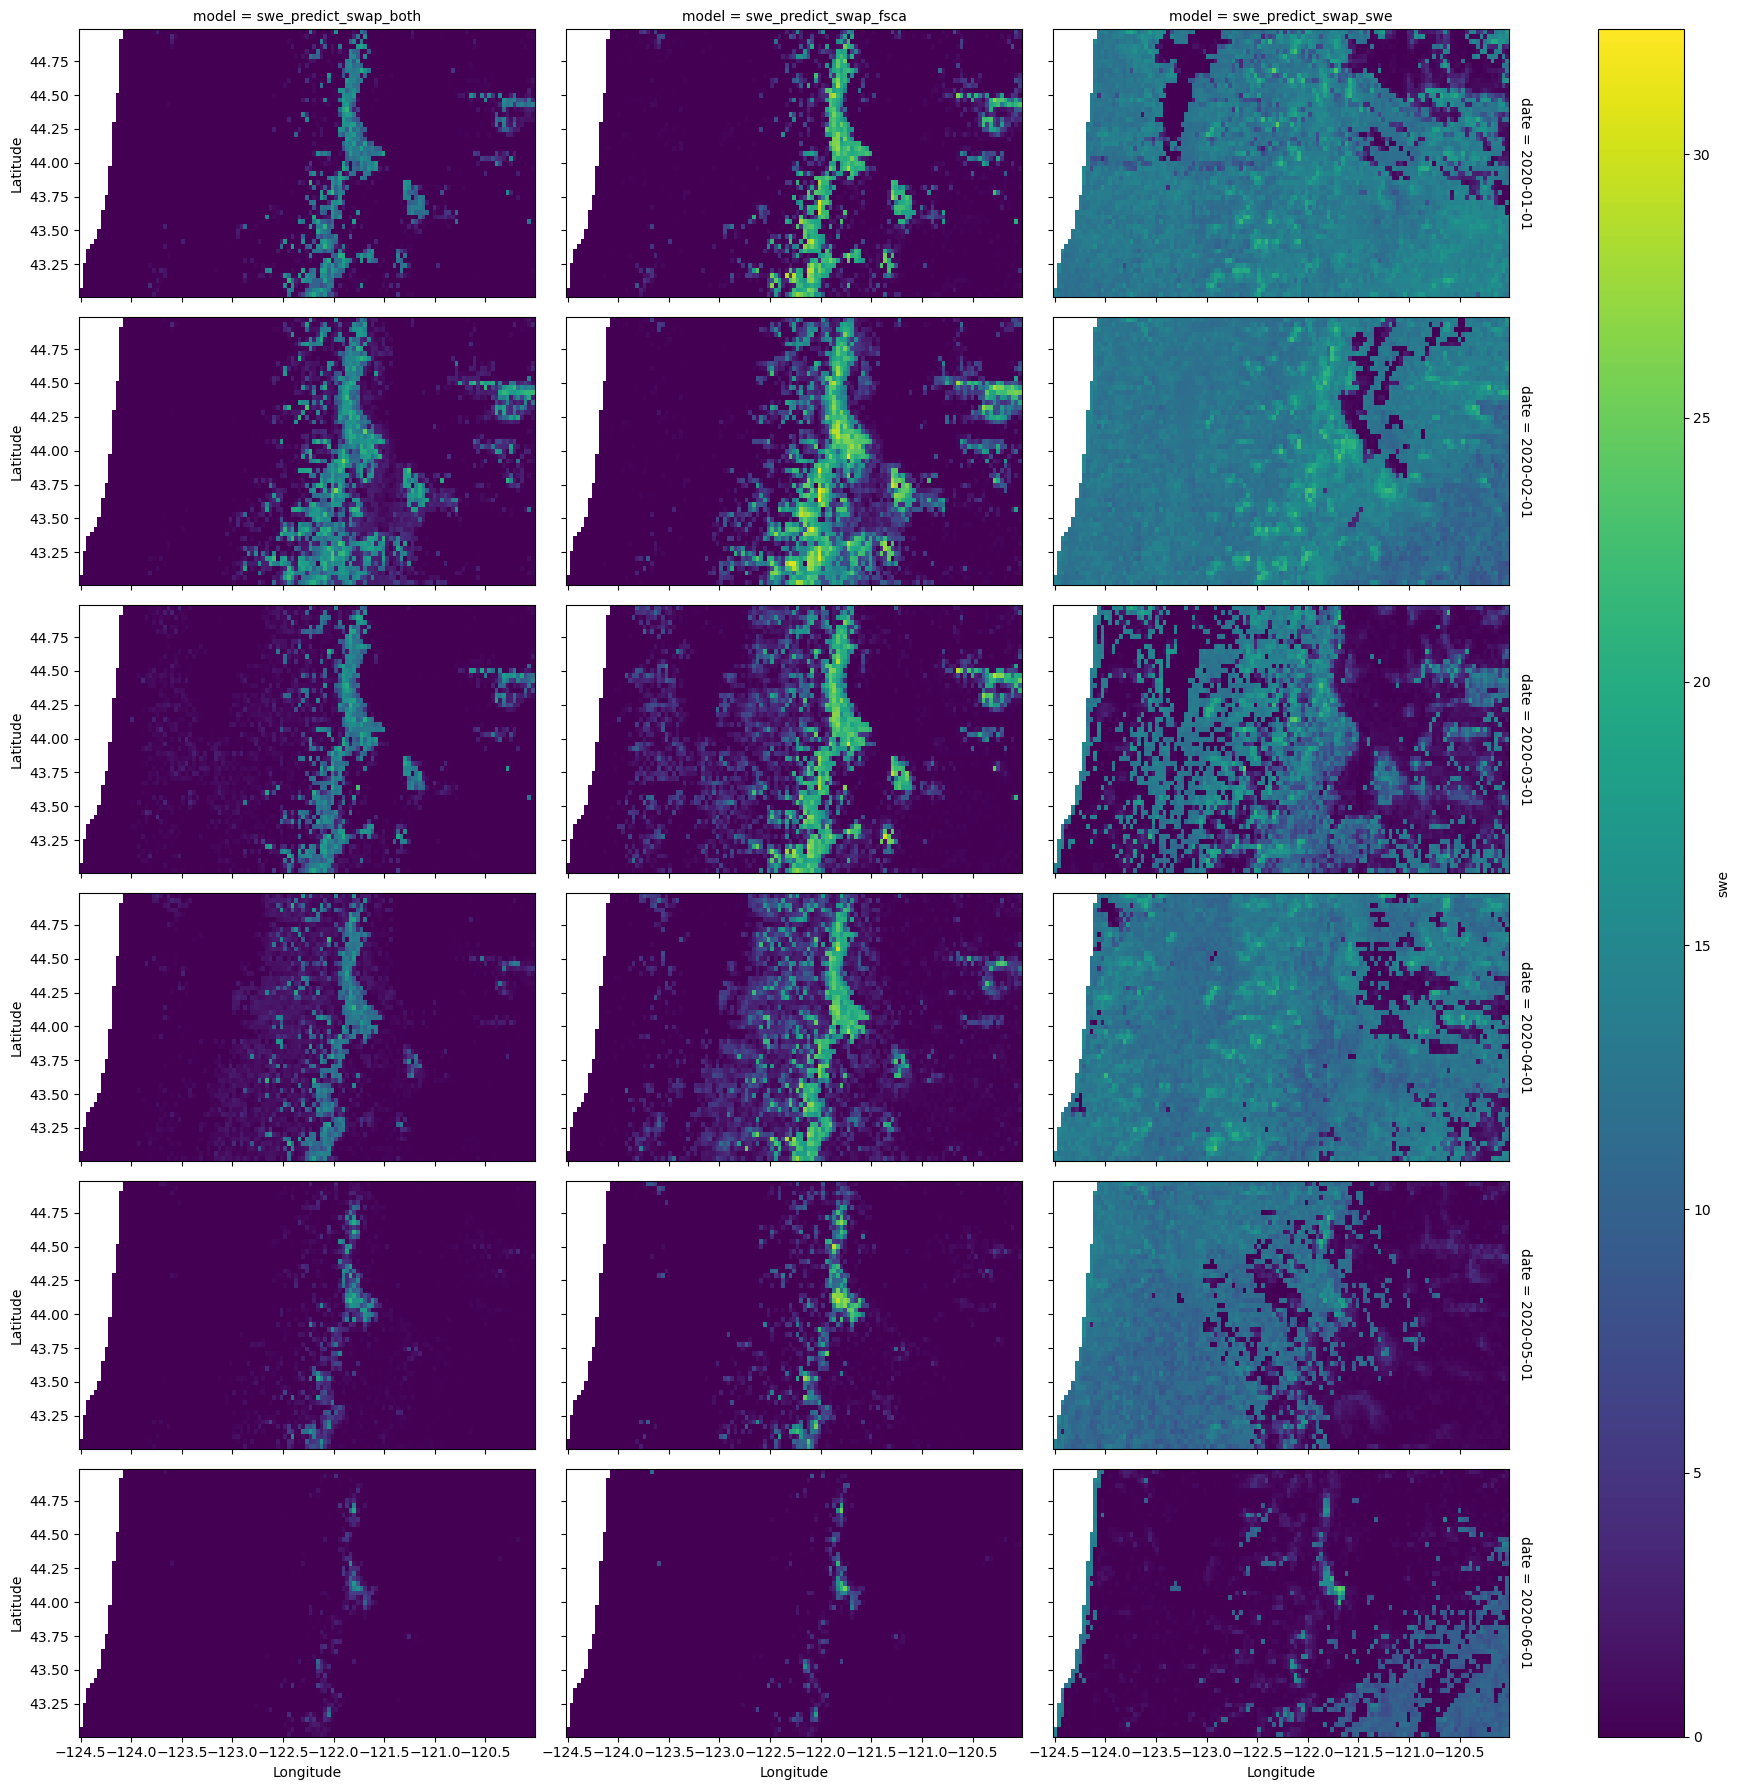

In [76]:
melted_xr.swe.plot(row="date", col="model", aspect=2)

In [77]:
melted_xr.to_netcdf("/home/jovyan/shared-public/ml_swe_monitoring_prod/ucla_fsca_swe_output.nc")

In [78]:
melted_xr

<xarray.Dataset> Size: 992kB
Dimensions:    (Latitude: 55, Longitude: 125, date: 6, model: 3)
Coordinates:
  * Latitude   (Latitude) float64 440B 43.02 43.06 43.1 ... 44.9 44.93 44.97
  * Longitude  (Longitude) float64 1kB -124.5 -124.5 -124.4 ... -120.1 -120.0
  * date       (date) object 48B '2020-01-01' '2020-02-01' ... '2020-06-01'
  * model      (model) object 24B 'swe_predict_swap_both' ... 'swe_predict_sw...
Data variables:
    swe        (Latitude, Longitude, date, model) float64 990kB 0.0 ... 0.7266

In [79]:
import folium

In [96]:
def folium_map(date, model, vmin=0, vmax=35):
    data2plot = np.flipud(melted_xr.sel(date=date, model=model).swe.values.astype(np.float64))
    lon, lat = np.meshgrid(melted_xr.Longitude.values.astype(np.float64), melted_xr.Latitude.values.astype(np.float64))
    
    cm = plt.get_cmap('viridis')
    normed_data = (data2plot - vmin) / (vmax - vmin)
    colored_data = cm(normed_data)
    
    m = folium.Map(location=[lat.mean(), lon.mean()], zoom_start=4)

    gterrain = folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Terrain',
        overlay = True,
        control = True
    )
    gterrain.add_to(m)
    
    folium.raster_layers.ImageOverlay(
        image=colored_data,
        bounds=[[lat.min(), lon.min()], [lat.max(), lon.max()]],
        opacity=0.5
    ).add_to(m)
    
    return m


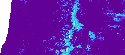

In [97]:
folium_map("2020-01-01", "swe_predict_swap_fsca")